## Turbine components sizing

## Rotor diameter vs. Power

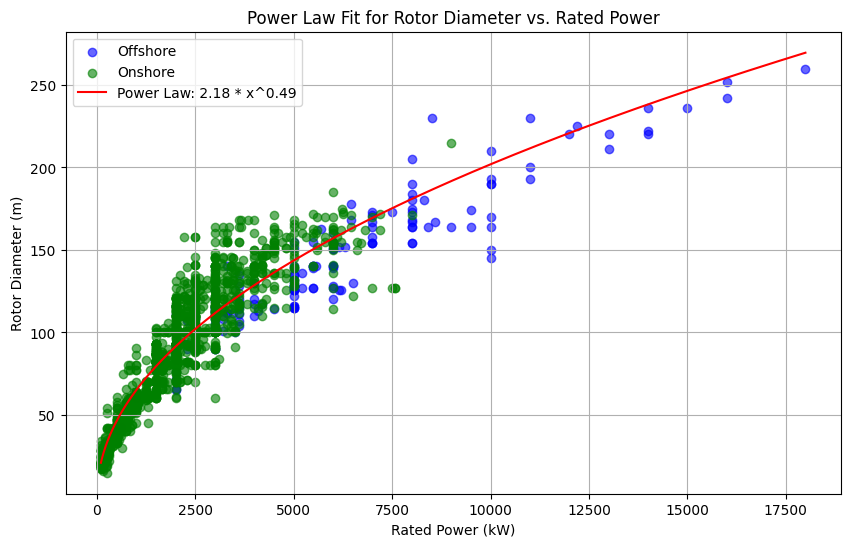

Power Law Equation: Rotor Diameter = 2.18 * Rated Power^0.49


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the spreadsheet
file_path = "Turbines_20230629.xlsx"
xls = pd.ExcelFile(file_path)

# Load the "Turbines" sheet
df_turbines = pd.read_excel(xls, sheet_name="Turbines")

# Clean and extract relevant columns
df_turbines = df_turbines.iloc[1:]  # Remove the first row with redundant column headers
df_turbines = df_turbines[['Rated power', 'Rotor diameter', 'Offshore']].copy()

df_turbines['Rated power'] = pd.to_numeric(df_turbines['Rated power'], errors='coerce')
df_turbines['Rotor diameter'] = pd.to_numeric(df_turbines['Rotor diameter'], errors='coerce')
df_turbines.dropna(inplace=True)

# Ensure Offshore column is properly recognized as boolean
df_turbines['Offshore'] = df_turbines['Offshore'].astype(str).str.strip().str.lower() == 'yes'

# Extracting values
x = df_turbines['Rated power'].values
y = df_turbines['Rotor diameter'].values

def power_law(x, a, b):
    return a * x**b

# Fit the power law model
popt, _ = curve_fit(power_law, x, y, maxfev=10000)

# Generate fit line
x_range = np.linspace(min(x), max(x), 1000)
y_fit = power_law(x_range, *popt)

# Plot the data and power law fit
plt.figure(figsize=(10, 6))

# Plot offshore and onshore data separately
plt.scatter(df_turbines[df_turbines['Offshore']]['Rated power'],
            df_turbines[df_turbines['Offshore']]['Rotor diameter'],
            label="Offshore", color="blue", alpha=0.6)

plt.scatter(df_turbines[~df_turbines['Offshore']]['Rated power'],
            df_turbines[~df_turbines['Offshore']]['Rotor diameter'],
            label="Onshore", color="green", alpha=0.6)

plt.plot(x_range, y_fit, label=f"Power Law: {popt[0]:.2f} * x^{popt[1]:.2f}", color="red")

plt.xlabel("Rated Power (kW)")
plt.ylabel("Rotor Diameter (m)")
plt.legend()
plt.title("Power Law Fit for Rotor Diameter vs. Rated Power")
plt.grid(True)
plt.show()

# Display power law parameters
print(f"Power Law Equation: Rotor Diameter = {popt[0]:.2f} * Rated Power^{popt[1]:.2f}")

## Rotor diameter vs. Rotor weight

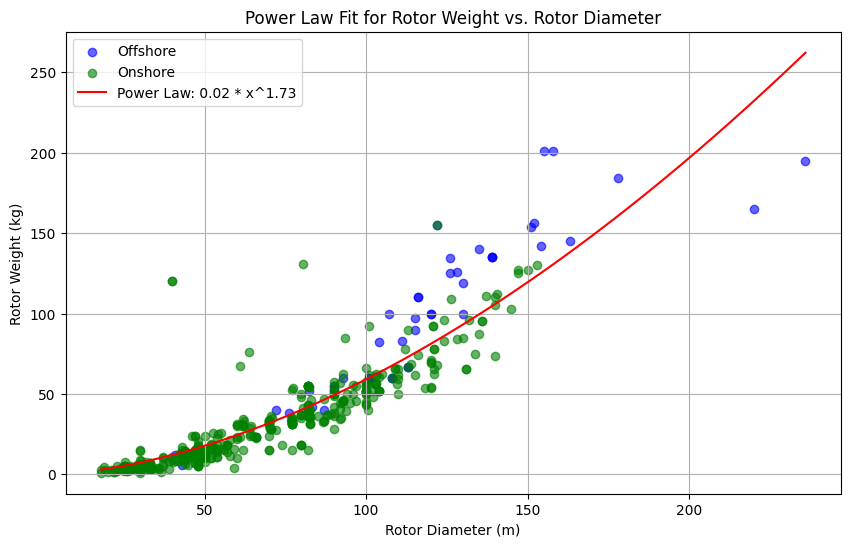

Power Law Equation: Rotor Weight = 0.02 * Rotor Diameter^1.73


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the spreadsheet
file_path = "Turbines_20230629.xlsx"
xls = pd.ExcelFile(file_path)

# Load the "Turbines" sheet
df_turbines = pd.read_excel(xls, sheet_name="Turbines")

# Clean and extract relevant columns
df_turbines = df_turbines.iloc[1:]  # Remove the first row with redundant column headers
df_turbines = df_turbines[['Rotor diameter', 'Rotor weight', 'Offshore']].copy()

df_turbines['Rotor diameter'] = pd.to_numeric(df_turbines['Rotor diameter'], errors='coerce')
df_turbines['Rotor weight'] = pd.to_numeric(df_turbines['Rotor weight'], errors='coerce')
df_turbines.dropna(inplace=True)

# Ensure Offshore column is properly recognized as boolean
df_turbines['Offshore'] = df_turbines['Offshore'].astype(str).str.strip().str.lower() == 'yes'

# Extracting values
x = df_turbines['Rotor diameter'].values
y = df_turbines['Rotor weight'].values

def power_law(x, a, b):
    return a * x**b

# Fit the power law model
popt, _ = curve_fit(power_law, x, y, maxfev=10000)

# Generate fit line
x_range = np.linspace(min(x), max(x), 1000)
y_fit = power_law(x_range, *popt)

# Plot the data and power law fit
plt.figure(figsize=(10, 6))

# Plot offshore and onshore data separately
plt.scatter(df_turbines[df_turbines['Offshore']]['Rotor diameter'],
            df_turbines[df_turbines['Offshore']]['Rotor weight'],
            label="Offshore", color="blue", alpha=0.6)

plt.scatter(df_turbines[~df_turbines['Offshore']]['Rotor diameter'],
            df_turbines[~df_turbines['Offshore']]['Rotor weight'],
            label="Onshore", color="green", alpha=0.6)

plt.plot(x_range, y_fit, label=f"Power Law: {popt[0]:.2f} * x^{popt[1]:.2f}", color="red")

plt.xlabel("Rotor Diameter (m)")
plt.ylabel("Rotor Weight (kg)")
plt.legend()
plt.title("Power Law Fit for Rotor Weight vs. Rotor Diameter")
plt.grid(True)
plt.show()

# Display power law parameters
print(f"Power Law Equation: Rotor Weight = {popt[0]:.2f} * Rotor Diameter^{popt[1]:.2f}")


## Hub height vs. Rotor diameter

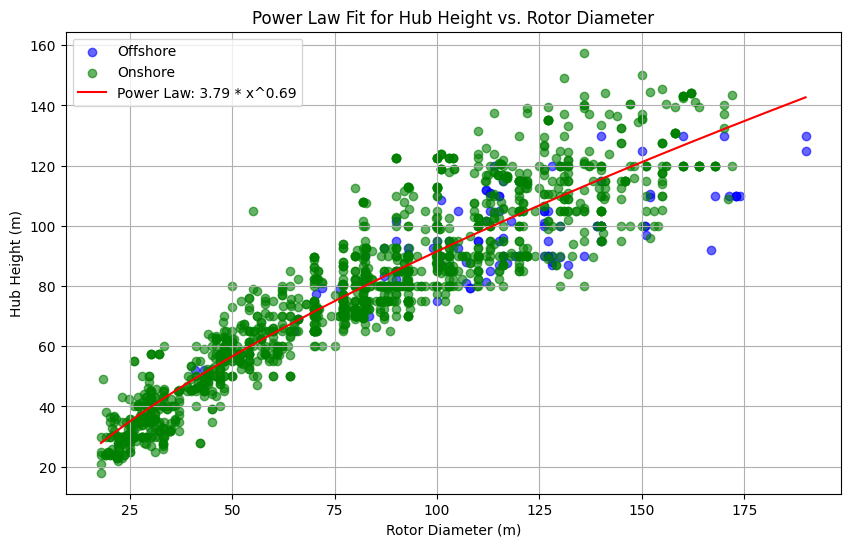

Power Law Equation: Hub Height = 3.79 * Rotor Diameter^0.69


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the spreadsheet
file_path = "Turbines_20230629.xlsx"
xls = pd.ExcelFile(file_path)

# Load the "Turbines" sheet
df_turbines = pd.read_excel(xls, sheet_name="Turbines")

# Clean and extract relevant columns
df_turbines = df_turbines.iloc[1:]  # Remove the first row with redundant column headers
df_turbines = df_turbines[['Rotor diameter', 'Minimum hub height', 'Maximum hub height', 'Offshore']].copy()

df_turbines['Rotor diameter'] = pd.to_numeric(df_turbines['Rotor diameter'], errors='coerce')
df_turbines['Minimum hub height'] = pd.to_numeric(df_turbines['Minimum hub height'], errors='coerce')
df_turbines['Maximum hub height'] = pd.to_numeric(df_turbines['Maximum hub height'], errors='coerce')

# Compute the average hub height
df_turbines['Hub height'] = (df_turbines['Minimum hub height'] + df_turbines['Maximum hub height']) / 2
df_turbines.dropna(inplace=True)

# Ensure Offshore column is properly recognized as boolean
df_turbines['Offshore'] = df_turbines['Offshore'].astype(str).str.strip().str.lower() == 'yes'

# Extracting values
x = df_turbines['Rotor diameter'].values
y = df_turbines['Hub height'].values

def power_law(x, a, b):
    return a * x**b

# Fit the power law model
popt, _ = curve_fit(power_law, x, y, maxfev=10000)

# Generate fit line
x_range = np.linspace(min(x), max(x), 1000)
y_fit = power_law(x_range, *popt)

# Plot the data and power law fit
plt.figure(figsize=(10, 6))

# Plot offshore and onshore data separately
plt.scatter(df_turbines[df_turbines['Offshore']]['Rotor diameter'],
            df_turbines[df_turbines['Offshore']]['Hub height'],
            label="Offshore", color="blue", alpha=0.6)

plt.scatter(df_turbines[~df_turbines['Offshore']]['Rotor diameter'],
            df_turbines[~df_turbines['Offshore']]['Hub height'],
            label="Onshore", color="green", alpha=0.6)

plt.plot(x_range, y_fit, label=f"Power Law: {popt[0]:.2f} * x^{popt[1]:.2f}", color="red")

plt.xlabel("Rotor Diameter (m)")
plt.ylabel("Hub Height (m)")
plt.legend()
plt.title("Power Law Fit for Hub Height vs. Rotor Diameter")
plt.grid(True)
plt.show()

# Display power law parameters
print(f"Power Law Equation: Hub Height = {popt[0]:.2f} * Rotor Diameter^{popt[1]:.2f}")


## Nacelle mass vs. Power

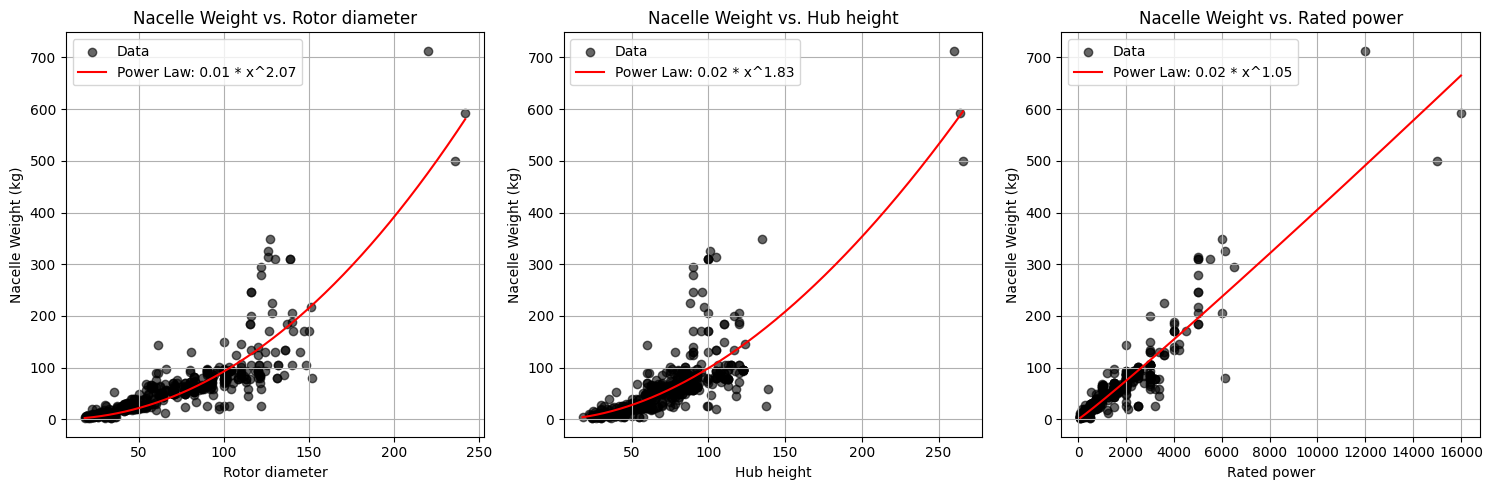

Power Law Equation for Rotor diameter: Nacelle Weight = 0.0066 * Rotor diameter^2.0735
Power Law Equation for Hub height: Nacelle Weight = 0.0212 * Hub height^1.8349
Power Law Equation for Rated power: Nacelle Weight = 0.0249 * Rated power^1.0529


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the spreadsheet
file_path = "Turbines_20230629.xlsx"
xls = pd.ExcelFile(file_path)

# Load the "Turbines" sheet
df_turbines = pd.read_excel(xls, sheet_name="Turbines")

# Clean and extract relevant columns
df_turbines = df_turbines.iloc[1:]  # Remove the first row with redundant column headers
df_turbines = df_turbines[['Rotor diameter', 'Minimum hub height', 'Maximum hub height', 'Rated power', 'Nacelle weight', 'Offshore']].copy()

df_turbines['Rotor diameter'] = pd.to_numeric(df_turbines['Rotor diameter'], errors='coerce')
df_turbines['Minimum hub height'] = pd.to_numeric(df_turbines['Minimum hub height'], errors='coerce')
df_turbines['Maximum hub height'] = pd.to_numeric(df_turbines['Maximum hub height'], errors='coerce')
df_turbines['Rated power'] = pd.to_numeric(df_turbines['Rated power'], errors='coerce')
df_turbines['Nacelle weight'] = pd.to_numeric(df_turbines['Nacelle weight'], errors='coerce')

# Compute the average hub height
df_turbines['Hub height'] = (df_turbines['Minimum hub height'] + df_turbines['Maximum hub height']) / 2
df_turbines.dropna(inplace=True)

# Ensure Offshore column is properly recognized as boolean
df_turbines['Offshore'] = df_turbines['Offshore'].astype(str).str.strip().str.lower() == 'yes'

# Define power law function
def power_law(x, a, b):
    return a * x**b

# Fit models for different predictors
predictors = ['Rotor diameter', 'Hub height', 'Rated power']
fit_results = {}

for predictor in predictors:
    x = df_turbines[predictor].values
    y = df_turbines['Nacelle weight'].values
    try:
        popt, _ = curve_fit(power_law, x, y, maxfev=10000)
        fit_results[predictor] = popt
    except Exception as e:
        fit_results[predictor] = str(e)

# Generate plots
plt.figure(figsize=(15, 5))

for i, predictor in enumerate(predictors, 1):
    x = df_turbines[predictor].values
    y = df_turbines['Nacelle weight'].values
    x_range = np.linspace(min(x), max(x), 1000)
    y_fit = power_law(x_range, *fit_results[predictor])

    plt.subplot(1, 3, i)
    plt.scatter(x, y, label="Data", color="black", alpha=0.6)
    plt.plot(x_range, y_fit, label=f"Power Law: {fit_results[predictor][0]:.2f} * x^{fit_results[predictor][1]:.2f}", color="red")
    plt.xlabel(predictor)
    plt.ylabel("Nacelle Weight (kg)")
    plt.legend()
    plt.title(f"Nacelle Weight vs. {predictor}")
    plt.grid(True)

plt.tight_layout()
plt.show()

# Display best fit parameters
for predictor, params in fit_results.items():
    print(f"Power Law Equation for {predictor}: Nacelle Weight = {params[0]:.4f} * {predictor}^{params[1]:.4f}")


In [2]:
## Tower mass vs. Power

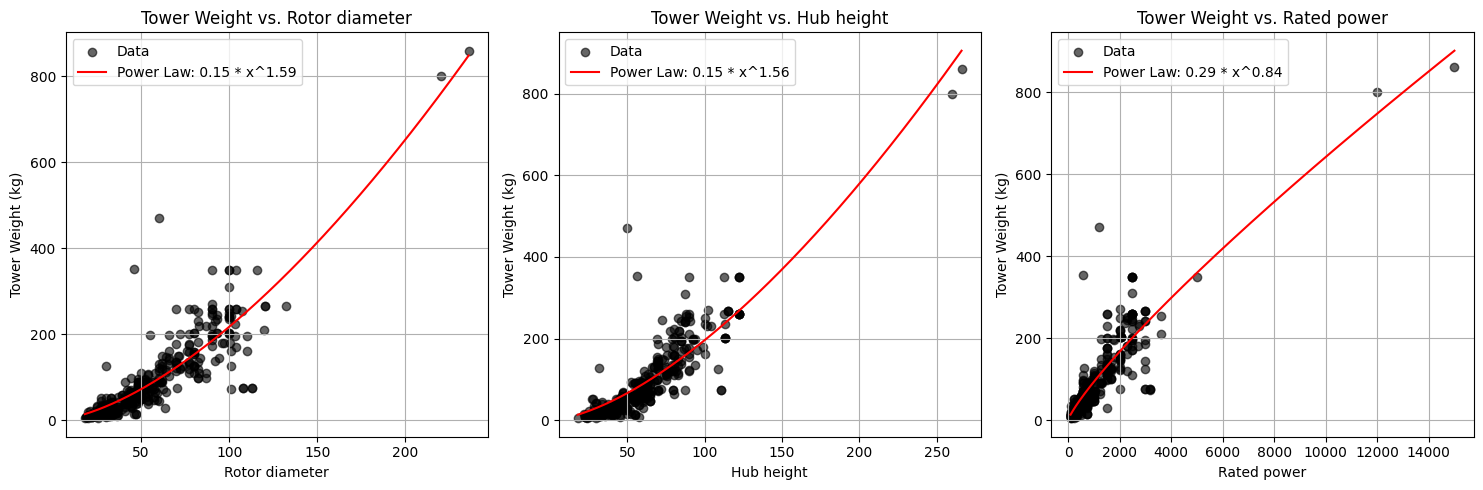

Power Law Equation for Rotor diameter: Tower Weight = 0.15 * Rotor diameter^1.59
Power Law Equation for Hub height: Tower Weight = 0.15 * Hub height^1.56
Power Law Equation for Rated power: Tower Weight = 0.29 * Rated power^0.84


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import re

# Load the spreadsheet
file_path = "Turbines_20230629.xlsx"
xls = pd.ExcelFile(file_path)

# Load the "Turbines" sheet
df_turbines = pd.read_excel(xls, sheet_name="Turbines")

# Clean and extract relevant columns
df_turbines = df_turbines.iloc[1:]  # Remove the first row with redundant column headers
df_turbines = df_turbines[['Rotor diameter', 'Minimum hub height', 'Maximum hub height', 'Rated power', 'Tower weight', 'Offshore']].copy()

df_turbines['Rotor diameter'] = pd.to_numeric(df_turbines['Rotor diameter'], errors='coerce')
df_turbines['Minimum hub height'] = pd.to_numeric(df_turbines['Minimum hub height'], errors='coerce')
df_turbines['Maximum hub height'] = pd.to_numeric(df_turbines['Maximum hub height'], errors='coerce')
df_turbines['Rated power'] = pd.to_numeric(df_turbines['Rated power'], errors='coerce')

# Function to process tower weight values
def process_tower_weight(value):
    if isinstance(value, str):
        numbers = re.findall(r"\d+", value)
        if len(numbers) == 2:
            return (float(numbers[0]) + float(numbers[1])) / 2
        elif len(numbers) == 1:
            return float(numbers[0])
    return pd.to_numeric(value, errors='coerce')

df_turbines['Tower weight'] = df_turbines['Tower weight'].apply(process_tower_weight)

# Compute the average hub height
df_turbines['Hub height'] = (df_turbines['Minimum hub height'] + df_turbines['Maximum hub height']) / 2

# Filter out unrealistic tower weights (above 500 tons for height < 150m)
df_turbines = df_turbines[~((df_turbines['Tower weight'] > 500) & (df_turbines['Hub height'] < 150))]

df_turbines.dropna(inplace=True)

# Ensure Offshore column is properly recognized as boolean
df_turbines['Offshore'] = df_turbines['Offshore'].astype(str).str.strip().str.lower() == 'yes'

# Define power law function
def power_law(x, a, b):
    return a * x**b

# Fit models for different predictors
predictors = ['Rotor diameter', 'Hub height', 'Rated power']
fit_results = {}

for predictor in predictors:
    x = df_turbines[predictor].values
    y = df_turbines['Tower weight'].values
    try:
        popt, _ = curve_fit(power_law, x, y, maxfev=10000)
        fit_results[predictor] = popt
    except Exception as e:
        fit_results[predictor] = str(e)

# Generate plots
plt.figure(figsize=(15, 5))

for i, predictor in enumerate(predictors, 1):
    x = df_turbines[predictor].values
    y = df_turbines['Tower weight'].values
    x_range = np.linspace(min(x), max(x), 1000)
    y_fit = power_law(x_range, *fit_results[predictor])

    plt.subplot(1, 3, i)
    plt.scatter(x, y, label="Data", color="black", alpha=0.6)
    plt.plot(x_range, y_fit, label=f"Power Law: {fit_results[predictor][0]:.2f} * x^{fit_results[predictor][1]:.2f}", color="red")
    plt.xlabel(predictor)
    plt.ylabel("Tower Weight (kg)")
    plt.legend()
    plt.title(f"Tower Weight vs. {predictor}")
    plt.grid(True)

plt.tight_layout()
plt.show()

# Display best fit parameters
for predictor, params in fit_results.items():
    print(f"Power Law Equation for {predictor}: Tower Weight = {params[0]:.2f} * {predictor}^{params[1]:.2f}")


## Foundation mass vs. Power

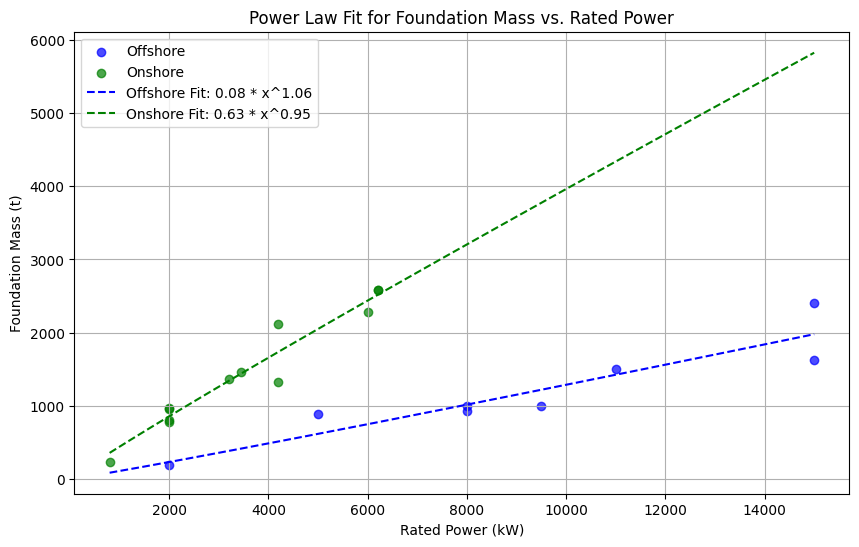

(array([0.0760978 , 1.05723116]), array([0.63057294, 0.94949599]))

In [42]:
# Re-import necessary libraries after execution state reset
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

# Define the dataset again
data = {
    "kW": [9500, 8000, 11000, 8000, 15000, 5000, 15000, 2000, 3200, 2000, 2000, 2000, 2000, 6200, 3450, 4200, 4200, 6000, 6200, 800],
    "Foundation mass offshore (t)": [996, 1000, 1500, 925, 2400, 885, 1622, 200, None, None, None, None, None, None, None, None, None, None, None, None],
    "Foundation mass onshore (t)": [None, None, None, None, None, None, None, None, 1370, 810, 788, 966, 963, 2580, 1459, 1328, 2119, 2287, 2580, 230]
}

df = pd.DataFrame(data)

# Convert columns to numeric and drop NaNs
df["Foundation mass offshore (t)"] = pd.to_numeric(df["Foundation mass offshore (t)"], errors='coerce')
df["Foundation mass onshore (t)"] = pd.to_numeric(df["Foundation mass onshore (t)"], errors='coerce')


# Define power law function
def power_law(x, a, b):
    return a * x**b

# Fit the power law model separately for offshore and onshore
x_offshore = df["kW"][df["Foundation mass offshore (t)"].notna()].values
y_offshore = df["Foundation mass offshore (t)"][df["Foundation mass offshore (t)"].notna()].values

x_onshore = df["kW"][df["Foundation mass onshore (t)"].notna()].values
y_onshore = df["Foundation mass onshore (t)"][df["Foundation mass onshore (t)"].notna()].values

popt_offshore, _ = curve_fit(power_law, x_offshore, y_offshore, maxfev=10000)
popt_onshore, _ = curve_fit(power_law, x_onshore, y_onshore, maxfev=10000)

# Generate fit line
x_range = np.linspace(min(df["kW"]), max(df["kW"]), 1000)
y_fit_offshore = power_law(x_range, *popt_offshore)
y_fit_onshore = power_law(x_range, *popt_onshore)

# Plot the data and fits
plt.figure(figsize=(10, 6))

plt.scatter(x_offshore, y_offshore, color='blue', label="Offshore", alpha=0.7)
plt.scatter(x_onshore, y_onshore, color='green', label="Onshore", alpha=0.7)
plt.plot(x_range, y_fit_offshore, color='blue', linestyle="--", label=f"Offshore Fit: {popt_offshore[0]:.2f} * x^{popt_offshore[1]:.2f}")
plt.plot(x_range, y_fit_onshore, color='green', linestyle="--", label=f"Onshore Fit: {popt_onshore[0]:.2f} * x^{popt_onshore[1]:.2f}")

plt.xlabel("Rated Power (kW)")
plt.ylabel("Foundation Mass (t)")
plt.legend()
plt.title("Power Law Fit for Foundation Mass vs. Rated Power")
plt.grid(True)
plt.show()

# Display best fit parameters
popt_offshore, popt_onshore


## Fleet distribution

We plot the distribution of wind turbines' 2023 electricity production in Denmark vs. their capacity (onshore only, wind turbines older than 2000 ignored), and try to find the best parameter to fit a lognormal distribution.

/var/folders/cn/pys1j9rn0y7djkhv3hfdtrs00000gn/T/ipykernel_6815/3815725804.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[connection_date_col] = pd.to_datetime(df[connection_date_col], errors='coerce')
/var/folders/cn/pys1j9rn0y7djkhv3hfdtrs00000gn/T/ipykernel_6815/3815725804.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Capacity Bin'] = pd.cut(df_filtered[capacity_col], bins=bin_edges, right=False)
/var/folders/cn/pys1j9rn0y7djkhv3hfdtrs00000gn/T/ipykernel_6815/3815725804.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future ver

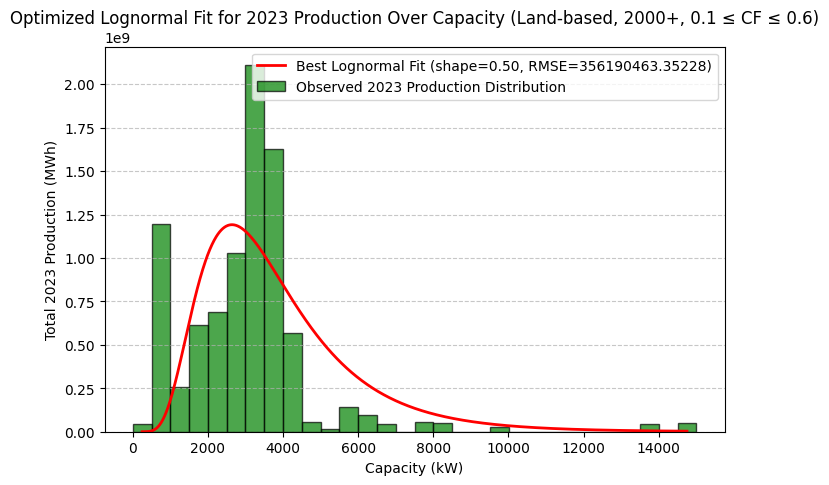

Best Fit Shape (σ): 0.5000
Best Fit Scale (exp(μ)): 3392.1790
Best Scaling Factor: 4470011516314.8750
Best RMSE: 356190463.35228
Mean Capacity:  3054.3843271157994


In [30]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.stats import lognorm
from scipy.optimize import curve_fit

# Load dataset (update with actual file path)
file_path = "danish_wind_turbine_registry.xlsx"  # Modify this to the correct file path
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name='Ark1', skiprows=3)

# Clean headers
df.columns = df.iloc[4]  # Set the actual column names
df = df[5:].reset_index(drop=True)  # Remove unnecessary rows

# Define column names
capacity_col = "Capacity (kW)"
production_2023_col = next(col for col in df.columns if "2023" in str(col))
connection_date_col = "Date of original connection to grid"
placement_col = "Type of location"

# Convert columns to appropriate types
df[capacity_col] = pd.to_numeric(df[capacity_col], errors='coerce')
df[production_2023_col] = pd.to_numeric(df[production_2023_col], errors='coerce')
df[connection_date_col] = pd.to_datetime(df[connection_date_col], errors='coerce')

# Compute Capacity Factor: (Annual production) / (Capacity * Hours in a year)
df["Capacity Factor"] = df[production_2023_col] / (df[capacity_col] * 24 * 365)

# Apply filtering conditions
df_filtered = df[
    (df[connection_date_col].dt.year >= 2000) &  # Connected in 2000 or later
    (df["Capacity Factor"].between(0.1, 0.6)) &  # Capacity Factor between 0.1 and 0.6
    (df[placement_col].astype(str).str.strip().str.upper() == "LAND")  # Land-based turbines
]

# Aggregate production per capacity bin
bin_edges = np.arange(df_filtered[capacity_col].min(), df_filtered[capacity_col].max() + 500, 500)  # Bin width of 500 kW
df_filtered['Capacity Bin'] = pd.cut(df_filtered[capacity_col], bins=bin_edges, right=False)

# Sum production in each bin
production_per_bin = df_filtered.groupby('Capacity Bin')[production_2023_col].sum()

# Extract numerical bin centers
bin_centers = np.array([(interval.left + interval.right) / 2 for interval in production_per_bin.index.categories])

# Compute total production sum for scaling
total_production = production_per_bin.sum()

# fetch average capacity of the distirbution
# production-weighted average capacity
production_per_bin_ = production_per_bin.reset_index()
production_per_bin_["Capacity"] = bin_centers
production_per_bin_["Capacity * Production"] = production_per_bin_["Capacity"] * production_per_bin_[2023]


# Define function for fitting lognormal distribution (scaled to production)
def lognormal_pdf_scaled(x, shape, scale, scaling_factor):
    return lognorm.pdf(x, s=shape, scale=np.exp(scale)) * scaling_factor

# Try different skew factors to find the best lognormal fit (now including scaling factor)
best_params = None
best_rmse = float("inf")
best_fitted_pdf = None

# Define a range of possible shape parameters (skew factors)
shape_values = np.linspace(0.5, 2.5, 20)

for shape in shape_values:
    try:
        # Fit lognormal with a fixed shape parameter and optimize scale & scaling factor
        params, _ = curve_fit(
            lambda x, scale, scaling_factor: lognormal_pdf_scaled(x, shape, scale, scaling_factor),
            bin_centers, production_per_bin,
            p0=[np.log(np.median(bin_centers)), total_production]  # Initial guesses
        )

        # Compute RMSE
        fitted_pdf = lognormal_pdf_scaled(bin_centers, shape, *params)
        rmse = np.sqrt(np.mean((production_per_bin - fitted_pdf) ** 2))

        # Keep the best fit (lowest RMSE)
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = (shape, *params)
            x_values = np.linspace(min(bin_centers), max(bin_centers), 1000)
            best_fitted_pdf = lognormal_pdf_scaled(x_values, *best_params)

    except RuntimeError:
        continue  # Ignore cases where optimization fails

# Plot histogram and best lognormal fit
plt.figure(figsize=(8, 5))
plt.bar(bin_centers, production_per_bin, width=500, alpha=0.7, color='g', edgecolor='black', label="Observed 2023 Production Distribution")
plt.plot(x_values, best_fitted_pdf, color='r', linewidth=2, label=f"Best Lognormal Fit (shape={best_params[0]:.2f}, RMSE={best_rmse:.5f})")

plt.xlabel("Capacity (kW)")
plt.ylabel("Total 2023 Production (MWh)")
plt.title("Optimized Lognormal Fit for 2023 Production Over Capacity (Land-based, 2000+, 0.1 ≤ CF ≤ 0.6)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print best-fit parameters and RMSE
print(f"Best Fit Shape (σ): {best_params[0]:.4f}")
print(f"Best Fit Scale (exp(μ)): {np.exp(best_params[1]):.4f}")
print(f"Best Scaling Factor: {best_params[2]:.4f}")
print(f"Best RMSE: {best_rmse:.5f}")
print("Mean Capacity: ", production_per_bin_["Capacity * Production"].sum() / production_per_bin_[2023].sum())

Given a mean fleet power and boundariy values, we built a lognormal-shaped fleet distribution using a skew of 0.5, like above (and a mean capacity of 3MW).

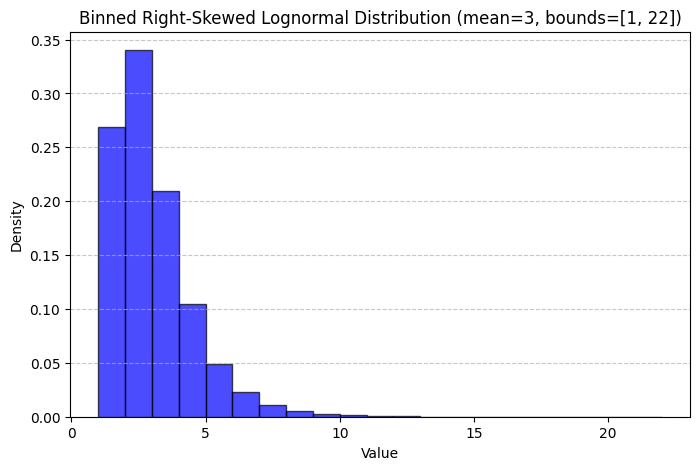

In [32]:
import numpy as np
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def bounded_lognormal_binned(mean, lower_bound, upper_bound, skew_factor=1.0):
    """
    Generates a binned bounded lognormal distribution with a given mean and integrates to 1.
    The bins are of width 1, making it a histogram-like distribution.

    Parameters:
        mean (float): The desired mean of the distribution.
        lower_bound (float): The lower boundary.
        upper_bound (float): The upper boundary.
        skew_factor (float): Factor to increase the skewness to the right.

    Returns:
        bin_edges (numpy.ndarray): Array of bin edges.
        binned_pdf (numpy.ndarray): Normalized probability density function per bin.
    """
    # Define a function to solve for the lognormal parameters
    def objective(lognorm_params):
        shape, log_scale = lognorm_params
        scale = np.exp(log_scale)
        dist = stats.lognorm(s=shape, scale=scale)
        expected_mean = dist.mean()
        expected_variance = dist.var()
        return [expected_mean - mean, expected_variance - (skew_factor * mean) ** 2]  # Increase variance to skew right

    # Initial guess: lognormal with standard deviation around log(mean)
    initial_guess = [1.0, np.log(mean)]
    shape_opt, log_scale_opt = fsolve(objective, initial_guess)

    # Create lognormal distribution with optimized parameters
    scale_opt = np.exp(log_scale_opt)
    dist = stats.lognorm(s=shape_opt, scale=scale_opt)

    # Define bin edges from lower to upper bound with step size of 1
    bin_edges = np.arange(lower_bound, upper_bound + 1, 1)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Midpoints for better visualization

    # Compute the unnormalized probability density function (PDF) for bin centers
    pdf = dist.pdf(bin_centers)

    # Compute normalization constant by integrating over the specified bounds
    normalization_factor, _ = integrate.quad(lambda t: dist.pdf(t), lower_bound, upper_bound)

    # Normalize the PDF so that the integral equals 1
    binned_pdf = pdf / normalization_factor

    return bin_edges, binned_pdf

mean_value = 3 #MW
lower_bound = 1 #MW
upper_bound = 22 #MW

# Generate the binned skewed distribution
bin_edges, binned_pdf = bounded_lognormal_binned(mean_value, lower_bound, upper_bound, skew_factor=0.5)

# Plot the binned result as a histogram
plt.figure(figsize=(8, 5))
plt.bar(bin_edges[:-1], binned_pdf, width=1, align='edge', alpha=0.7, color='b', edgecolor='black')
plt.xlabel("Value")
plt.ylabel("Density")
plt.title(f"Binned Right-Skewed Lognormal Distribution (mean={mean_value}, bounds=[{lower_bound}, {upper_bound}])")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [34]:
bin_edges

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])